<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-04-05 12:41:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.6MB/s    in 2.6s    

2025-04-05 12:41:23 (57.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


In [94]:
#select variables of interest
df_comp_age = df[['ConvertedCompYearly','Age','ResponseId']]

In [95]:
#check for missing Values NaN
(df_comp_age.isnull().sum())

ConvertedCompYearly    42002
Age                        0
ResponseId                 0
dtype: int64

In [96]:
#remove NaN
df_comp_age.dropna(subset='ConvertedCompYearly',inplace=True)

/tmp/ipykernel_1819/3880478773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_age.dropna(subset='ConvertedCompYearly',inplace=True)


In [97]:
(df_comp_age.isnull().sum())

ConvertedCompYearly    0
Age                    0
ResponseId             0
dtype: int64

In [98]:
#check datatype
df_comp_age['ConvertedCompYearly'].dtype

dtype('float64')

In [99]:
#calculate higher outliers for ConvertedCompYearly
Q3 = df_comp_age['ConvertedCompYearly'].quantile(0.75)
Q1 = df_comp_age['ConvertedCompYearly'].quantile(0.25)  
IQR = Q3-Q1  
higher_outlier = Q3 + 1.5*IQR 
higher_outlier

np.float64(220860.75)

In [100]:
#count outliers
outlier_count = len(df_comp_age[df_comp_age['ConvertedCompYearly'] >= higher_outlier])
print(outlier_count)

978


In [101]:
#filter outliers
df_comp_filtered = df_comp_age[df_comp_age['ConvertedCompYearly']<higher_outlier]

In [102]:
#filter for Age - All age except Under 18 and Prefer not to say
df_comp_filtered_age = df_comp_filtered[~df_comp_filtered['Age'].isin(['Prefer not to say','Under 18 years old'])]

In [103]:
#group by Age and aggregate ConvertedCompYearly by calculatin median by group Age
df_comp_grouped = df_comp_filtered_age.groupby('Age')['ConvertedCompYearly'].median()

In [104]:
df_comp_grouped.head(10)

Age
18-24 years old       24707.0
25-34 years old       58000.0
35-44 years old       80000.0
45-54 years old       91295.0
55-64 years old      105000.0
65 years or older    100000.0
Name: ConvertedCompYearly, dtype: float64

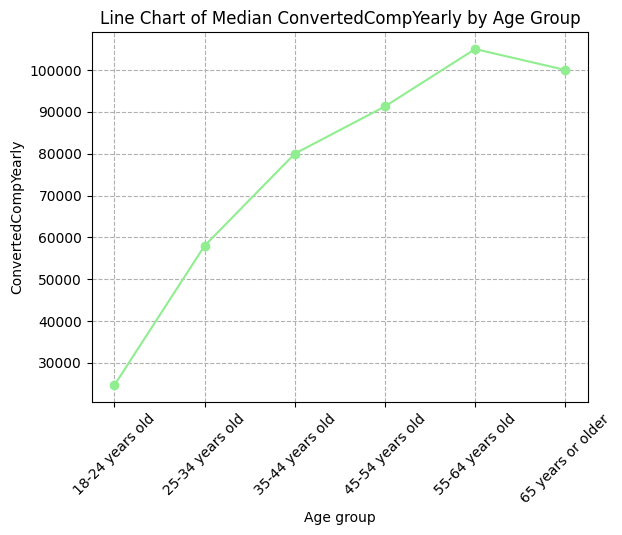

In [107]:
#change df_comp_grouped from series to df
df_comp_grouped = df_comp_grouped.reset_index()
#plot the line plot
plt.plot(df_comp_grouped['Age'], df_comp_grouped['ConvertedCompYearly'], marker='o', color='lightgreen')
plt.title('Line Chart of Median ConvertedCompYearly by Age Group') 
plt.xlabel('Age group') 
plt.xticks(rotation=45)
plt.ylabel('ConvertedCompYearly') 
plt.grid(linestyle='--')
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


In [17]:
#Data
df_comp_grouped.head()

Age
18-24 years old     24707.0
25-34 years old     58000.0
35-44 years old     80000.0
45-54 years old     91295.0
55-64 years old    105000.0
Name: ConvertedCompYearly, dtype: float64

In [18]:
#change df_comp_grouped from series to df
df_comp_grouped = df_comp_grouped.reset_index()
#filter Age for 25-34 and 35-44 years old
df_age_filtered = df_comp_grouped[df_comp_grouped['Age'].isin(['25-34 years old', '35-44 years old'])]

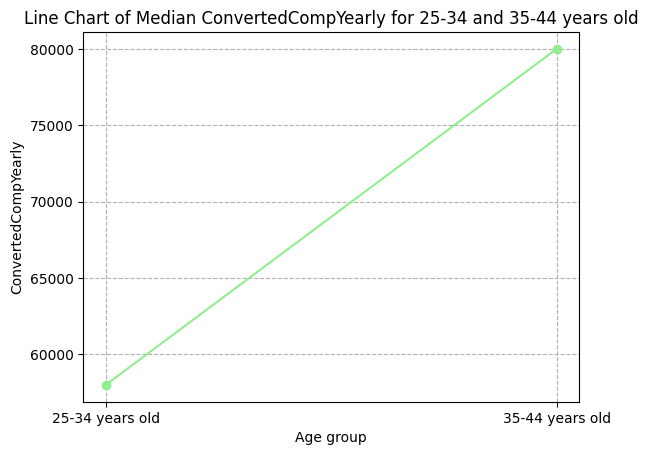

In [19]:
#plot the line plot
plt.plot(df_age_filtered['Age'], df_age_filtered['ConvertedCompYearly'], marker='o', color='lightgreen')
plt.title('Line Chart of Median ConvertedCompYearly for 25-34 and 35-44 years old') 
plt.xlabel('Age group') 
plt.ylabel('ConvertedCompYearly') 
plt.grid(linestyle='--')
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


➡️*I Choose 'YearsCodePro' as variable that approximates experience Level*

In [20]:
#select data YearsCodePro as Experience
df_jobsat = df[['YearsCodePro','JobSatPoints_6','ResponseId']]

In [21]:
#Rename YearsCodePro for Experience
df_jobsat.rename(columns={'YearsCodePro': 'Experience'}, inplace=True)

/tmp/ipykernel_1819/3606898746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobsat.rename(columns={'YearsCodePro': 'Experience'}, inplace=True)


In [22]:
#check df
df_jobsat.head()

,Experience,JobSatPoints_6,ResponseId
0,NaN,NaN,1
1,17,0.0,2
2,27,NaN,3
3,NaN,NaN,4
4,NaN,NaN,5


In [23]:
(df_jobsat.isnull().sum())

Experience        13827
JobSatPoints_6    35987
ResponseId            0
dtype: int64

In [24]:
#remove NaN
df_jobsat.dropna(subset=['Experience','JobSatPoints_6'],inplace=True)

/tmp/ipykernel_1819/577051487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobsat.dropna(subset=['Experience','JobSatPoints_6'],inplace=True)


In [25]:
(df_jobsat.isnull().sum())

Experience        0
JobSatPoints_6    0
ResponseId        0
dtype: int64

In [26]:
df_jobsat['Experience'].unique()

array(['17', '12', '27', '10', 'Less than 1 year', '18', '15', '6', '7',
       '16', '14', '4', '8', '2', '29', '5', '30', '1', '25', '24', '26',
       '9', '20', '37', '11', '3', '13', '19', '21', '23', '34', '28',
       '32', '22', '33', '40', '39', '31', '35', '41', '38',
       'More than 50 years', '36', '43', '42', '50', '45', '44', '46',
       '48', '47', '49'], dtype=object)

In [27]:
#replace Less than 1 year by numerical 
df_jobsat['Experience'].replace(to_replace='Less than 1 year',value=1, inplace=True)

/tmp/ipykernel_1819/1790805649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_jobsat['Experience'].replace(to_replace='Less than 1 year',value=1, inplace=True)
/tmp/ipykernel_1819/1790805649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobsat['Experience'].replace(to_replace='Less than 1 year',value=1, inplace=True)


In [28]:
#replace more than 50 years by numerical 
df_jobsat['Experience'].replace(to_replace='More than 50 years',value=51, inplace=True)

/tmp/ipykernel_1819/3772379085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_jobsat['Experience'].replace(to_replace='More than 50 years',value=51, inplace=True)
/tmp/ipykernel_1819/3772379085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobsat['Experience'].replace(to_replace='More than 50 years',value=51, inplace=True)


In [29]:
df_jobsat['Experience'].unique()

array(['17', '12', '27', '10', 1, '18', '15', '6', '7', '16', '14', '4',
       '8', '2', '29', '5', '30', '1', '25', '24', '26', '9', '20', '37',
       '11', '3', '13', '19', '21', '23', '34', '28', '32', '22', '33',
       '40', '39', '31', '35', '41', '38', 51, '36', '43', '42', '50',
       '45', '44', '46', '48', '47', '49'], dtype=object)

In [30]:
#check data type
df_jobsat['Experience'].dtype

dtype('O')

In [31]:
#change data type from object to float for Experience
df_jobsat['Experience'] = df_jobsat['Experience'].astype(float)

/tmp/ipykernel_1819/3995985675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobsat['Experience'] = df_jobsat['Experience'].astype(float)


In [32]:
#group by Experience, aggregate by median JobSat
df_jobsat_grouped = df_jobsat.groupby('Experience')['JobSatPoints_6'].median()

In [33]:
df_jobsat_grouped.head()

Experience
1.0    10.0
2.0    15.0
3.0    20.0
4.0    20.0
5.0    20.0
Name: JobSatPoints_6, dtype: float64

In [34]:
#convert series in df
df_jobsat_grouped = df_jobsat_grouped.reset_index()
#sort df by ascending Experience level
df_jobsat_grouped.sort_values(by='Experience', ascending=True, inplace=True)

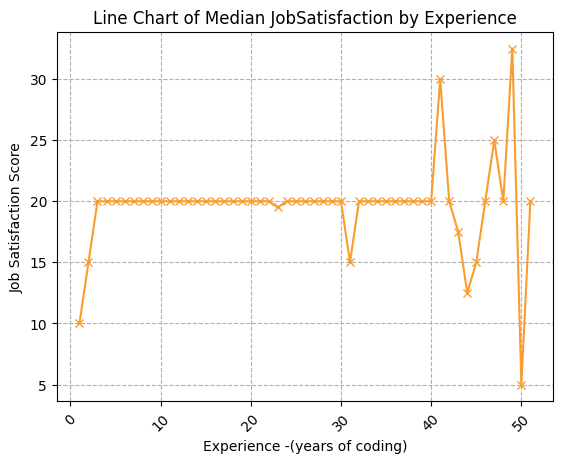

In [35]:
#plot the line plot
plt.plot(df_jobsat_grouped['Experience'],df_jobsat_grouped['JobSatPoints_6'], color='#f99d2f', marker='x') 
plt.title('Line Chart of Median JobSatisfaction by Experience') 
plt.xlabel('Experience -(years of coding)') 
plt.xticks(rotation=45)
plt.ylabel('Job Satisfaction Score') 
plt.grid(linestyle='--')
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


In [108]:
#select data 
df_yearly =df[['ConvertedCompYearly','ResponseId','WorkExp']]

In [109]:
#check data
(df_yearly.isnull().sum())

ConvertedCompYearly    42002
ResponseId                 0
WorkExp                35779
dtype: int64

In [110]:
#remove NaN
df_yearly.dropna(subset=['ConvertedCompYearly','WorkExp'],inplace=True)

/tmp/ipykernel_1819/155945869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearly.dropna(subset=['ConvertedCompYearly','WorkExp'],inplace=True)


In [111]:
#check NaN removal
(df_yearly.isnull().sum())

ConvertedCompYearly    0
ResponseId             0
WorkExp                0
dtype: int64

In [112]:
#count outliers
outlier_yearly_count = len(df_yearly[df_yearly['ConvertedCompYearly'] >= higher_outlier])
print(outlier_yearly_count)

637


In [113]:
#filter outliers
df_yearly_filtered = df_yearly[df_yearly['ConvertedCompYearly']<higher_outlier]

In [114]:
#check WorkExp variable
df_yearly['WorkExp'].unique()

array([ 3.,  7.,  8., 18., 30., 16., 17.,  1.,  4., 15., 25., 20., 10.,
       11., 28., 24., 12., 23.,  9., 40., 14., 27., 26.,  0., 19., 22.,
       13., 44., 41.,  2.,  5.,  6., 31., 36., 29., 45., 39., 38., 35.,
       21., 34., 50., 32., 37., 33., 42., 46., 43., 49., 48., 47.])

In [115]:
df_yearly['WorkExp'].dtype

dtype('float64')

In [116]:
#group by WorkExp
df_yearly_grouped = df_yearly_filtered.groupby('WorkExp')['ConvertedCompYearly'].median()

In [117]:
df_yearly.head()

,ConvertedCompYearly,ResponseId,WorkExp
72,7322.0,73,3.0
379,91295.0,380,7.0
389,110000.0,390,8.0
392,161044.0,393,18.0
398,195000.0,399,30.0


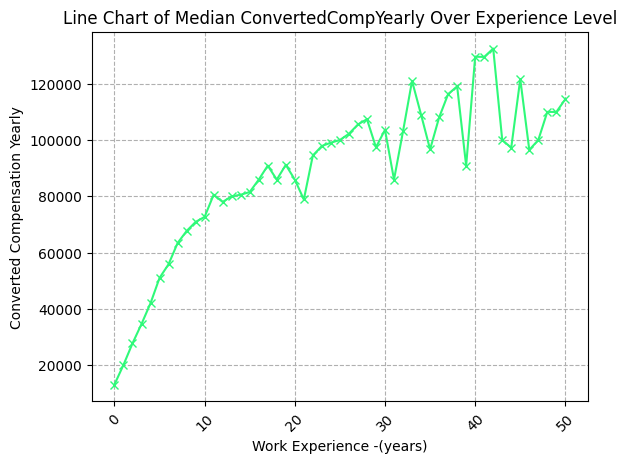

In [46]:
#plot the line plot
df_yearly_grouped.plot(kind='line', color='#2ff979', marker='x') 
plt.title('Line Chart of Median ConvertedCompYearly Over Experience Level') 
plt.xlabel('Work Experience -(years)') 
plt.xticks(rotation=45)
plt.ylabel('Converted Compensation Yearly') 
plt.grid(linestyle='--')
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


In [118]:
#select data of interest
df_satisfaction = df[['WorkExp','JobSatPoints_6','ResponseId']]

In [119]:
#check data
df_satisfaction.head()

,WorkExp,JobSatPoints_6,ResponseId
0,NaN,NaN,1
1,17.0,0.0,2
2,NaN,NaN,3
3,NaN,NaN,4
4,NaN,NaN,5


In [120]:
#check data for missing value
(df_satisfaction.isnull().sum())

WorkExp           35779
JobSatPoints_6    35987
ResponseId            0
dtype: int64

In [121]:
#remove NaN
df_satisfaction.dropna(subset=['WorkExp','JobSatPoints_6'],inplace=True)

/tmp/ipykernel_1819/687984260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_satisfaction.dropna(subset=['WorkExp','JobSatPoints_6'],inplace=True)


In [122]:
#check data for missing value
(df_satisfaction.isnull().sum())

WorkExp           0
JobSatPoints_6    0
ResponseId        0
dtype: int64

In [123]:
#group by WorkExp
df_sat_grouped = df_satisfaction.groupby('WorkExp')['JobSatPoints_6'].median()

In [124]:
df_sat_grouped.head()

WorkExp
0.0     5.0
1.0    10.0
2.0    15.0
3.0    20.0
4.0    20.0
Name: JobSatPoints_6, dtype: float64

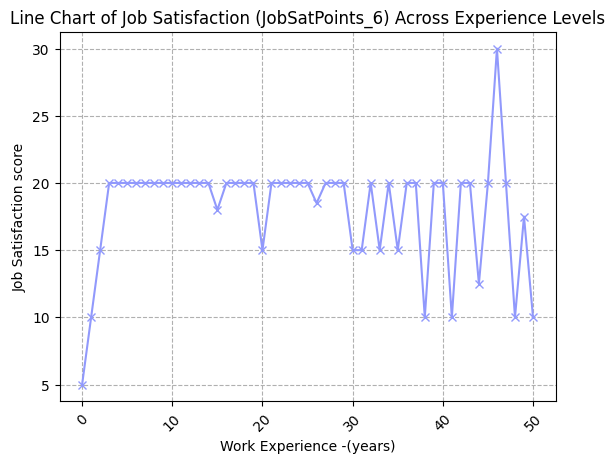

In [125]:
#plot the line plot
df_sat_grouped.plot(kind='line', color='#9199fc', marker='x') 
plt.title('Line Chart of Job Satisfaction (JobSatPoints_6) Across Experience Levels') 
plt.xlabel('Work Experience -(years)') 
plt.xticks(rotation=45)
plt.ylabel('Job Satisfaction score') 
plt.grid(linestyle='--')
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
